In [1]:
import pandas as pd
from typing import Tuple
import lxml.html
import re

df_origin = pd.read_csv('data/2018-07-15.csv')
df_origin.head(3)

title                    id  \
0  KarateによるAPIのシナリオテスト自動化 #04 Defining Data  1a7920d0dbc2099db000   
1       WSL bashでファイル(フォルダ)をnotepad.exeで開く方法  5414e0beb7df9908949d   
2        【ポエム】Scala製ゲームサーバーのあれやこれやを大チューニングした  79679ad9911da6ea0309   

                  created_at                 updated_at  likes_count  \
0  2018-07-31T08:52:15+09:00  2018-07-31T08:52:15+09:00            1   
1  2018-07-31T08:45:42+09:00  2018-07-31T08:45:42+09:00            2   
2  2018-07-31T08:33:49+09:00  2018-07-31T11:51:53+09:00           27   

   comments_count                                  tags_str        user_id  \
0               0                           test,bdd,Karate      takanorig   
1               1  Bash,Windows10,BashOnUbuntuOnWindows,WSL           yuip   
2               0              Scala,Redis,MongoDB,Akka,ポエム  yonezawaizumi   

   user_permanent_id                                                url  \
0              22893  https://qiita.com/takanorig/items/1a7920d0dbc2...   
1             170548  https://qiita.com/yuip/items/5414e0beb7df9908949d   
2              98308  https://qiita.com/yonezawaizumi/items/79679ad9...   

                                       rendered_body  \
0  \n<h1>\n<span id="はじめに" class="fragment"></spa...   
1  <p>久々のQiita投稿です。淫夢記事しか投稿してないのはまずいかなと思ってまともな記事を...   
2  <p>私は現在、Scalaで書かれているわりと古めのゲーム用サーバーに、いろいろ機能追加した...   

                                                body  
0  # はじめに\n[前回（#03 Writing Scenarios）](https://qi...  
1  \n\n\n久々のQiita投稿です。淫夢記事しか投稿してないのはまずいかなと思ってまともな...  
2  私は現在、Scalaで書かれているわりと古めのゲーム用サーバーに、いろいろ機能追加したり不具...

In [2]:
df_content = pd.read_csv('data/2018-07-15-content.csv')
df_content.head(3)

Unnamed: 0                    id  \
0           0  1a7920d0dbc2099db000   
1           1  5414e0beb7df9908949d   
2           2  79679ad9911da6ea0309   

                                                text  \
0  はじめには、モックのサービスを作成して、実際にシナリオテストを実施してみました。今回は、テス...   
1  久々のQiita投稿です。淫夢記事しか投稿してないのはまずいかなと思ってまともな記事を1つシ...   
2  私は現在、Scalaで書かれているわりと古めのゲーム用サーバーに、いろいろ機能追加したり不具...   

                                          code-frame  \
0  Scenario: Normal def\n\n* def text = 'karate e...   
1  \n# # notepadの位置を確認\n$ which notepad.exe\n/mnt...   
2  command: findAndModify { findandmodify: "chara...   

                                                lang  \
0  cucumber,cucumber,cucumber,cucumber,cucumber,c...   
1                                              sh,sh   
2                                            js,text   

                                                code  \
0  def,print,match,""",jsonData,set,table,set,tab...   
1                                                NaN   
2  var,findAndModify,findAndModify,findAndModify,...   

                                              a-text  \
0  前回（#03 Writing Scenarios）,https://github.com/i...   
1             WSLのbashからWindowsの実行ファイルを実行する | yuipro   
2  Goでテストクライアントを書いたり,1,Goでテストクライアントを書くことで、安価なLinu...   

                                              a-href  
0  #%E3%81%AF%E3%81%98%E3%82%81%E3%81%AB,https://...  
1  https://yuis-programming.com/2018/06/19/wsl%e3...  
2  https://qiita.com/yonezawaizumi/items/01384aad...

In [3]:
text = df_content["text"]
tags_str = df_origin["tags_str"]
df = pd.DataFrame({'text':text, 'tags_str':tags_str})

In [38]:
df.head()

text  \
0  はじめには、モックのサービスを作成して、実際にシナリオテストを実施してみました。今回は、テス...   
1  久々のQiita投稿です。淫夢記事しか投稿してないのはまずいかなと思ってまともな記事を1つシ...   
2  私は現在、Scalaで書かれているわりと古めのゲーム用サーバーに、いろいろ機能追加したり不具...   
3  提案 - Issue -いいねが付く記事は、有用な記事。誰かの役に立っている記事 のはずだ。...   
4  URL直打ちとはそのままURLに直接打ち込むこと。対策していないと、他のユーザーが自分のペー...   

                                   tags_str  
0                           test,bdd,Karate  
1  Bash,Windows10,BashOnUbuntuOnWindows,WSL  
2              Scala,Redis,MongoDB,Akka,ポエム  
3                                     Qiita  
4                                Ruby,Rails

In [39]:
from collections import Counter

frequency = Counter()

for tag in tags_str:
#     print(tag.split(','))
    frequency.update(tag.split(','))

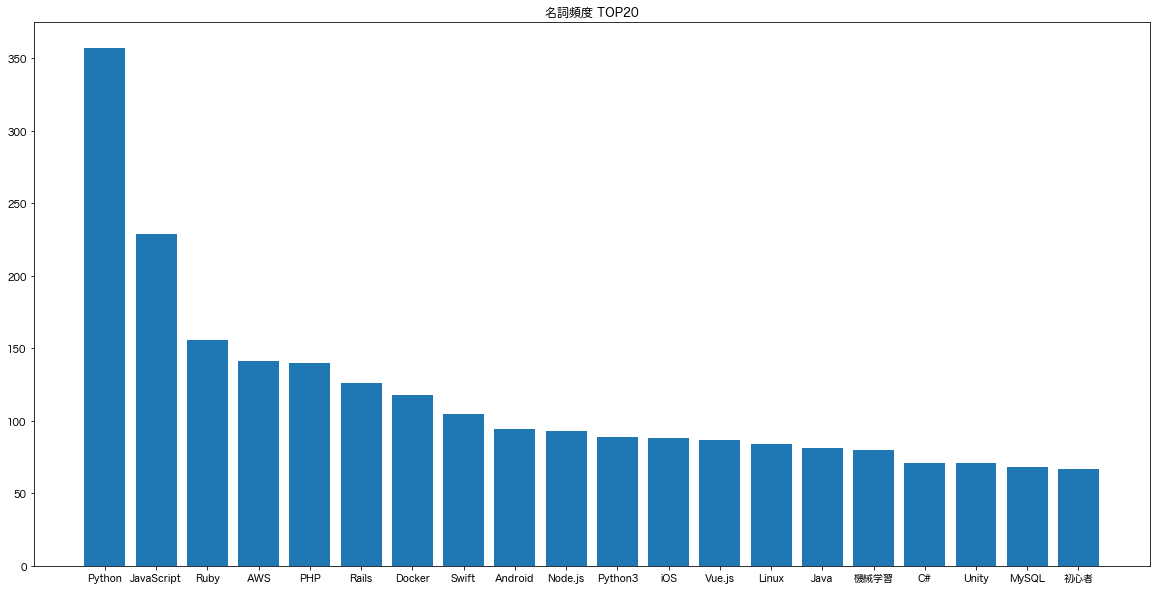

In [40]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# TOP20のグラフ           
x = range(20)
mc = frequency.most_common(20)              # 頻度TOP20を抽出
ch = [ch[0] for ch in mc]           # ひらがなのリスト
f = np.array([ch[1] for ch in mc])  # 頻度の数値のリスト


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.bar(x, f)
ax.set_xticks(x)
ax.set_xticklabels(ch , fontsize=10)  #日本語表示はfontproperties=fp
ax.set_title("名詞頻度 TOP20")

plt.show()

In [47]:
from pandas import Series
df_python = pd.DataFrame(index=[],columns=df.columns.values)
df_js = pd.DataFrame()
df_ruby = pd.DataFrame()
df_swift = pd.DataFrame()
df_php = pd.DataFrame()


for index, row in df.iterrows():
    obj = Series()
    if "Python" in row['tags_str'].split(","):
        obj= row
        obj['tag'] = "python"
        df_python = df_python.append(obj, ignore_index=True)
    if "JavaScript" in row['tags_str'].split(","):
        obj = row
        obj['tag'] = "javascript"
        df_js = df_js.append(obj, ignore_index=True)
    if "Ruby" in row['tags_str'].split(","):
        obj = row
        obj['tag'] = "ruby"
        df_ruby = df_ruby.append(row, ignore_index=True)
    if "Swift" in row['tags_str'].split(","):
        obj = row
        obj['tag'] = "swift"
        df_swift = df_swift.append(row, ignore_index=True)
    if "PHP" in row['tags_str'].split(","):
        obj = row
        obj['tag'] = "php"
        df_php = df_php.append(row, ignore_index=True)
            
#     seri = get_string(row['rendered_body'])
#     seri['id'] = row['id']
#     df = df.append(seri, ignore_index=True)

In [48]:
print(len(df_python))
print(len(df_js))
print(len(df_swift))
print(len(df_ruby))
print(len(df_php))

357
229
105
156
140


## トピックモデルでクラスタリングする

ゆくゆくは、
機械学習、チュートリアル、初心者、ポエム、ネタ記事などで分けることを考える

## 辞書の作成

課題　ストップワードをどのように定義するか

In [4]:
import MeCab
tagger = MeCab.Tagger(' -d /usr/local/lib/mecab/dic/naist-jdic')
tagger.parse('')

# "/usr/local/lib/mecab/dic/naist-jdic"
# /usr/local/lib/mecab/dic/mecab-ipadic-neologd

hinshi_list = ['名詞','動詞','形容詞']
def get_words(content):
    node = tagger.parseToNode(content)
    words = []
    woo = []
    while node:
        pos, pos_sub1 = node.feature.split(',')[:2]
    #     print(pos, pos_sub1)
        if pos in hinshi_list:
            woo.append(node.surface)
        if pos == '名詞' and pos_sub1 in ('固有名詞', '一般'):
            words.append(node.surface)

#         print(node.surface, node.feature)
        node = node.next
    return words
    return woo

In [5]:
# from pprint import pprint
df_nonna = df_content[df_content['text'].isna() == False]
df_nonna.isna().sum()

wordss = []
for content in df_nonna["text"]:
    wordss.append(get_words(content))
# get_words(df_content['text'][0])

In [6]:
len(wordss)

3641

In [7]:
len(df_nonna)

3641

In [6]:
from collections import defaultdict
frequency = defaultdict(int)

# 単語の出現回数をfrequency変数でカウント
for text in wordss:
    for token in text:
        frequency[token] += 1

# frequency変数で1より上の単語のみを配列に構築
texts = [[token for token in text if frequency[token] > 1] for text in wordss]

In [9]:
texts

[['モック',
  '実際',
  'シナリオ',
  '幅',
  'Karate',
  'データ',
  '内容',
  'レスポンス',
  '内容',
  'データ',
  'データ',
  '方法',
  '変数',
  '基本',
  '変数',
  '変数',
  '変数',
  '内容',
  '値',
  '内容',
  '感じ',
  '日本語',
  'JSON',
  '形式',
  'データ',
  'JSON',
  'データ',
  '方法',
  'REST',
  'API',
  '辺り',
  '使い勝手',
  '基本',
  'マルチ',
  'ライン',
  'マルチ',
  'ライン',
  'データ',
  'データ',
  'コマンド',
  'データ',
  'テーブル',
  '形式',
  'JSON',
  'データ',
  'コマンド',
  '生',
  'JSON',
  'データ',
  'table',
  'ネスト',
  'JSON',
  'ネスト',
  'JSON',
  'データ',
  'コマンド',
  'テーブル',
  '形式',
  '内容',
  '行',
  '列',
  'データ',
  '内容',
  'パラメータ',
  '上記',
  'コマンド',
  '変数',
  '値',
  '変数',
  '文字',
  '列',
  '一部分',
  '別',
  '方法',
  'コマンド',
  '変数',
  '値',
  'デフォルト',
  '変数',
  '形式',
  'かたち',
  '変数',
  'パラメータ',
  '形式',
  'カスタマイズ',
  'かたち',
  '好み',
  'パラメータ',
  '見た目',
  'テーブル',
  '形式',
  '複数',
  'パラメータ',
  'ファイル',
  '読み込み',
  'データ',
  '内容',
  'feature',
  'ファイル',
  '手間',
  'ファイル',
  'ファイル',
  '読み込み',
  'ファイル',
  'Karate',
  'クラス',
  'まとめ',
  'Karate',
  'データ',
  '方法',
  'コマンド',


In [7]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(texts)

dictionary.save('data/qiita.dict')

In [8]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [12]:
# corpus

[[(0, 1),
  (1, 1),
  (2, 6),
  (3, 4),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 6),
  (13, 2),
  (14, 3),
  (15, 1),
  (16, 14),
  (17, 2),
  (18, 4),
  (19, 5),
  (20, 2),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 3),
  (29, 7),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 10),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 6),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 4),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1)],
 [(19, 1),
  (29, 1),
  (42, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2)],
 [(2, 1),
  (4, 3),
  (8, 1),
  (9, 1),
  (12, 6),
  (13, 1),
  (16, 5),
  (19, 2),
  (28, 3),
  (29, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (36, 2),
  (46, 13),
  (52, 4),
  (65, 1),
  (66, 1),
  (67, 3),
  (68, 1),
  (69, 7),
  (70, 1),
  (71, 1

In [9]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)

In [18]:
from pprint import pprint
pprint(lda.show_topics())

[(0,
  '0.021*"インストール" + 0.019*"ファイル" + 0.015*"環境" + 0.011*"コマンド" + 0.006*"バージョン" + '
  '0.006*"方法" + 0.005*"ディレクトリ" + 0.005*"サーバ" + 0.005*"下記" + 0.004*"Windows"'),
 (1,
  '0.008*"パラメーター" + 0.008*"内容" + 0.007*"方法" + 0.007*"データ" + 0.007*"環境" + '
  '0.007*"項目" + 0.006*"インストール" + 0.006*"コード" + 0.006*"クラス" + 0.005*"コマンド"'),
 (2,
  '0.012*"データ" + 0.009*"内容" + 0.008*"タイプ" + 0.008*"項目" + 0.007*"コード" + '
  '0.007*"クラス" + 0.007*"ファイル" + 0.006*"レジスタ" + 0.006*"記事" + 0.006*"モデル"'),
 (3,
  '0.009*"画面" + 0.008*"アプリ" + 0.008*"API" + 0.008*"コード" + 0.006*"内容" + '
  '0.006*"記事" + 0.006*"ユーザー" + 0.006*"方法" + 0.006*"環境" + 0.006*"情報"'),
 (4,
  '0.019*"データ" + 0.013*"関数" + 0.013*"コード" + 0.012*"ファイル" + 0.010*"文字" + '
  '0.008*"要素" + 0.007*"値" + 0.007*"列" + 0.006*"画像" + 0.006*"記事"')]


In [23]:
test_document = df_content['text'][9]
test_texts = get_words(test_document)
test_corpus = dictionary.doc2bow(test_texts)

In [24]:
for topics_per_document in lda[test_corpus]:
    pprint(topics_per_document)

(0, 0.3210029)
(2, 0.6592298)
